In [32]:
from torchvision.datasets import CIFAR100
import os
import torch.utils.data
import lightning as L
L.seed_everything(42)
DATASET_PATH = os.environ.get("PATH_DATASETS", "~/datasets/")
train_dataset = CIFAR100(root=DATASET_PATH, train=True, transform=None, download=True)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [0.9, 0.1])

Seed set to 42


Files already downloaded and verified


In [20]:
type(train_dataset)
type(train_dataset.dataset)

torchvision.datasets.cifar.CIFAR100

In [36]:
train_dataset[0]
from torchvision.transforms import v2
import torch
train_dataset.dataset.transform = v2.Compose([
                                      v2.ToTensor(),
    # v2.ToImage(), 
    # v2.ToDtype(torch.float32, scale=True) # scale 到 0-1
    ])
train_dataset.dataset.target_transform = None
train_dataset[0]

/home/ai_pitch_perfector/program_files/managers/conda/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


(tensor([[[0.8902, 0.8118, 0.7725,  ..., 0.5569, 0.6510, 0.6078],
          [0.9294, 0.9020, 0.8471,  ..., 0.5490, 0.6314, 0.5725],
          [0.9333, 0.9294, 0.8471,  ..., 0.4824, 0.5098, 0.4902],
          ...,
          [0.5373, 0.5059, 0.6706,  ..., 0.2941, 0.1765, 0.1176],
          [0.5020, 0.6118, 0.7176,  ..., 0.3255, 0.2000, 0.1098],
          [0.6549, 0.7098, 0.7490,  ..., 0.2706, 0.1882, 0.1098]],
 
         [[0.7137, 0.6392, 0.5843,  ..., 0.4118, 0.4980, 0.4784],
          [0.7333, 0.7216, 0.6549,  ..., 0.4157, 0.4902, 0.4431],
          [0.7373, 0.7412, 0.6549,  ..., 0.3765, 0.3922, 0.3843],
          ...,
          [0.4431, 0.3922, 0.5255,  ..., 0.2588, 0.1725, 0.1137],
          [0.4196, 0.5020, 0.5961,  ..., 0.3020, 0.1922, 0.1098],
          [0.5490, 0.5804, 0.6000,  ..., 0.2510, 0.1843, 0.1176]],
 
         [[0.2588, 0.1961, 0.1647,  ..., 0.0745, 0.0980, 0.1020],
          [0.2745, 0.2784, 0.2118,  ..., 0.0745, 0.0902, 0.0902],
          [0.2824, 0.2824, 0.2118,  ...,

In [28]:
train_dataset[0][0].shape
# 计算整个数据集像素点channel的平均值和标准差
import numpy as np
mean = np.mean(train_dataset.dataset.data/255, axis=(0,1,2))
std = np.std(train_dataset.dataset.data/255, axis=(0,1,2))
mean, std

(array([0.50707516, 0.48654887, 0.44091784]),
 array([0.26733429, 0.25643846, 0.27615047]))

In [31]:
test_dataset = CIFAR100(root=DATASET_PATH, train=False, transform=None, download=True)
test_dataset[0]

Files already downloaded and verified


(<PIL.Image.Image image mode=RGB size=32x32>, 49)

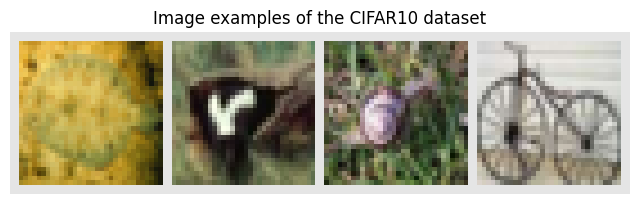

In [38]:
import torchvision
NUM_IMAGES = 4
CIFAR_images = torch.stack([train_dataset[idx][0] for idx in range(NUM_IMAGES)], dim=0)
img_grid = torchvision.utils.make_grid(CIFAR_images, nrow=4, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Image examples of the CIFAR10 dataset")
plt.imshow(img_grid)
plt.axis("off")
plt.show()